## PyTorch: ##

Installating/Importing PyTorch

! - is used when working on cloud. 

In [ ]:
# Uncomment the command below if PyTorch is not installed
# !conda install pytorch cpuonly -c pytorch -y

In [ ]:
import torch

### What are Tensors?

From Wikipedia - 

"A tensor is a mathematical object. Tensors provide a mathematical framework for solving physics problems in areas such as elasticity.

A tensor of order zero (zeroth-order tensor) is a scalar (simple number). A tensor of order one (first-order tensor) is a linear map that maps every vector into a scalar. A vector is a tensor of order one. A tensor of order two (second-order tensor) is a linear map that maps every vector into a vector (e.g. a matrix)."


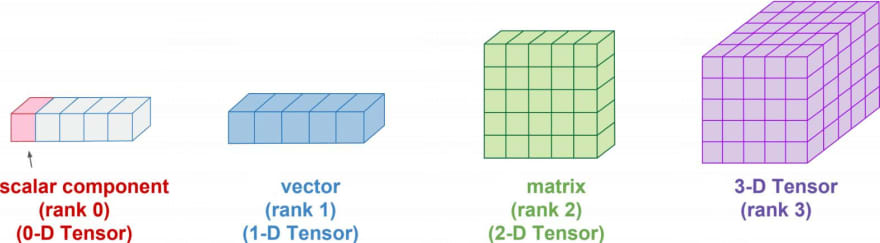

Pytorch is all about tensors.  



In [ ]:
# Scalar
scalar = torch.tensor(55)
print(scalar)
#scalar

In [ ]:
rank_0 = torch.tensor(55.)
rank_0

`55.` is a shorthand to write `55.0`. We use tensors with floating points beacuse in  Machine Learning we use themm the most. And adding "."indicates to Python (and PyTorch) that you want to create a floating point number. We can verify this by checking the `dtype` attribute of our tensor:

In [ ]:
print("The data type of scalar is: ", scalar.dtype)
print("The data type of rank_0 is: ", rank_0.dtype)

Moving to more complex tensors: 
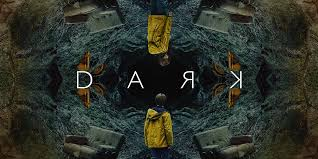

In [ ]:
# Vector
vector = torch.tensor([1., 2, 3, 4])
vector

In [ ]:
vector.dtype

In [ ]:
# Matrix
matrix = torch.tensor([[1., 2], 
                       [3,  4], 
                       [5,  6]])
matrix

# a property of tensor is that it has to remain always even, if you try to create uneven tensor it will give you an error. 

In [ ]:
# A question for you, create a tensor name alpha, fill it with a,b,c and d
# Take screenshot of the output of alpha and post in thread (tag me as well if you want series of sessions)

In [ ]:
# 3-dimensional Tensor - will give error - change what you have to ;) 
Threed_tensor = torch.tensor([
                        [[1.,2, 3], 
                        [ 4, 5, 6]], 
                        [[7, 8, 9], 
                        [ 1, 2, 3]]])
3d_tensor

We saw datatypes, can we see shapes of tensor once we made them? 

In [ ]:
print(scalar)
print(scalar.shape)
print(rank_0)
print(rank_0.shape)

In [ ]:
print(vector)
vector.shape

In [ ]:
print(matrix)
matrix.shape

In [ ]:
#For you to test: print the shape a of three dimensional tensor.
#You can create a new tensor or use the one we made in this notebook.

## Tensor operations and gradients

We can combine tensors with the usual arithmetic operations. Let's look an example:

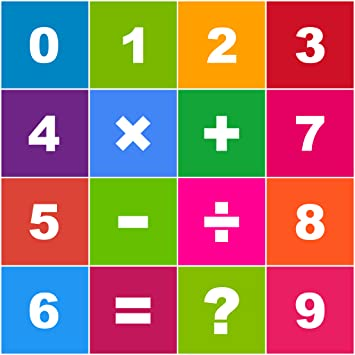

In [ ]:
# Create tensors.
x = torch.tensor(5., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(8., requires_grad=True)
x 
w
b

#For you to do - print all the tensors x,w,b without using print statemnet

We've created 3 tensors `x`, `w` and `b`, all numbers. `w` and `b` have an additional parameter `requires_grad` set to `True`. We'll see what it does in just a moment. 

Let's create a new tensor `y` by combining these tensors:

In [ ]:
# Arithmetic operations
y = w * x + b
y
#y.shape

As expected, `y` is a tensor with the value `2 * 5 + 8 = 18`. What makes PyTorch special is that we can automatically compute the derivative of `y` w.r.t. the tensors that have `requires_grad` set to `True` i.e. w and b. To compute the derivatives, we can call the `.backward` method on our result `y`.

In [ ]:
# Compute derivatives
y.backward()

The derivates of `y` w.r.t the input tensors are stored in the `.grad` property of the respective tensors.

In [ ]:
# Display gradients
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

As expected, `dy/dw` has the same value as `x` i.e. `5`, and `dy/db` has the value `1`. Note that `x.grad` is `None`, because `x` doesn't have `requires_grad` set to `True`. 

The "grad" in `w.grad` stands for gradient, which is another term for derivative, used mainly when dealing with matrices. 

## Interoperability with Numpy

[Numpy](http://www.numpy.org/) is a popular open source library used for mathematical and scientific computing in Python. It enables efficient operations on large multi-dimensional arrays, and has a large ecosystem of supporting libraries:

* [Matplotlib](https://matplotlib.org/) for plotting and visualization
* [OpenCV](https://opencv.org/) for image and video processing
* [Pandas](https://pandas.pydata.org/) for file I/O and data analysis

Instead of reinventing the wheel, PyTorch interoperates really well with Numpy to leverage its existing ecosystem of tools and libraries.

Here's how we create an array in Numpy:

In [ ]:
import numpy as np

x = np.array([[1, 2], [3, 4.]])
x

We can convert a Numpy array to a PyTorch tensor using `torch.from_numpy`.

In [ ]:
# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)
y

Let's verify that the numpy array and torch tensor have similar data types.

In [ ]:
x.dtype, y.dtype

We can convert a PyTorch tensor to a Numpy array using the `.numpy` method of a tensor.

In [ ]:
# Convert a torch tensor to a numpy array
z = y.numpy()
z

The interoperability between PyTorch and Numpy is really important because most datasets you'll work with will likely be read and preprocessed as Numpy arrays.

## Further Reading

Tensors in PyTorch support a variety of operations, and what we've covered here is by no means exhaustive. You can learn more about tensors and tensor operations here: https://pytorch.org/docs/stable/tensors.html

You can take advantage of the interactive Jupyter environment to experiment with tensors and try different combinations of operations discussed above. Here are some things to try out:

1. What if one or more `x`, `w` or `b` were matrices, instead of numbers, in the above example? What would the result `y` and the gradients `w.grad` and `b.grad` look like in this case?

2. What if `y` was a matrix created using `torch.tensor`, with each element of the matrix expressed as a combination of numeric tensors `x`, `w` and `b`?

3. What if we had a chain of operations instead of just one i.e. `y = x * w + b`, `z = l * y + m`, `w = c * z + d` and so on? What would calling `w.grad` do?

If you're interested, you can learn more about matrix derivates on Wikipedia (although it's not necessary for following along with this series of tutorials): https://en.wikipedia.org/wiki/Matrix_calculus#Derivatives_with_matrices 

## Credits

This notebook is modified version of the notebook by the following resource:

1) Freecode camp/Jovian.ml - zero to gans. 